Oleh Roikhatul Miskiyah - PYTN-KS05-010 - Batch 5

# Descriptive Statistics

## Calculating Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
# Mari buat beberapa data untuk dikerjakan. Kita akan mulai dengan List Python yang berisi beberapa data numerik:

x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [4]:
# Sekarang, buat objek np.ndarray dan pd.Series yang sesuai dengan x dan x_with_nan:

y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Mean

In [5]:
# Kita dapat menghitung mean dengan pure Python menggunakan sum() dan len(), tanpa mengimpor pustaka lain:

mean_ = sum(x) / len(x)
mean_

8.7

In [6]:
# menerapkan fungsi statistics built-in Python:

mean_ = statistics.mean(x)
print(mean_)

8.7


In [7]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [8]:
# mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [9]:
# Dalam contoh di atas, mean() adalah sebuah fungsi, tetapi kita juga dapat menggunakan method .mean ():

mean_ = y.mean()
mean_

8.7

In [10]:
# Fungsi mean() dan method .mean() dari NumPy mengembalikan hasil yang sama seperti statistics.mean(). Dibawah ini adalah kasus ketika ada nilai nan di antara data kita:

print(np.mean(y_with_nan))
print(y_with_nan.mean()) 

nan
nan


In [11]:
# dapat menggunakan np.nanmean ():

np.nanmean(y_with_nan)

8.7

In [15]:
# menerapkannya ke kumpulan data tanpa nilai nan.
# pd.Series objects juga mempunyai method .mean():
mean_ = z.mean()
mean_

8.7

In [16]:
# .mean() dari Pandas mengabaikan nilai nan secara default:

z_with_nan.mean()


8.7

## Weighted Mean

In [18]:
# Kita dapat mengimplementasikan weighted mean dalam Python pure dengan menggabungkan sum() dengan range() atau zip():

x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [19]:
# Kita dapat menggunakan np.average() untuk mendapatkan weighted mean dari array NumPy atau Series Pandas:

y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [20]:
# Solusi lain adalah dengan menggunakan element-wise produc w * y dengan np.sum() atau .sum():

(w * y).sum() / w.sum()

6.95

## Harmonic Mean

In [21]:
# Salah satu varian dari implementasi Python pure dari harmonic mean adalah dibawah ini:

hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [22]:
# Kita juga dapat menghitung ukuran ini dengan statistics.harmonic_mean():

hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [23]:
scipy.stats.hmean(y)

2.7613412228796843

In [24]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [25]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [27]:
# Kita juga bisa mendapatkan geometric mean dengan scipy.stats.gmean ():

scipy.stats.gmean(y)

4.67788567485604

In [28]:
scipy.stats.gmean(z)

4.67788567485604

## Median

In [29]:
# Berikut adalah salah satu dari banyak kemungkinan implementasi Python pure dari median:

n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [30]:
# Kita dapat menggunakan fungsi ini seperti halnya kita menggunakan median():

x

[8.0, 1, 2.5, 4, 28.0]

In [31]:
statistics.median_low(x[:-1])

2.5

In [32]:
statistics.median_high(x[:-1])

4

In [33]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [34]:
# Kita juga bisa mendapatkan median dengan np.median ():

median_ = np.median(y)
print(median_)

4.0


In [35]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [37]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [38]:
# Kita bisa mendapatkan mode dengan statistics.mode()

mode_ = statistics.mode(u)
mode_

2

In [40]:
# Kita juga bisa mendapatkan mode dengan scipy.stats.mode():

u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [41]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [42]:
# Kita bisa mendapatkan mode dan jumlah kemunculannya sebagai array NumPy dengan dot notation:

print(mode_.mode)
print(mode_.count)

[12]
[3]


In [43]:
# Objek Pandas Series memiliki metode .mode() yang menangani nilai multimodal dengan baik dan mengabaikan nilai nan secara default:

u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

In [44]:
# Berikut cara menghitung sample variance dengan Python pure:

n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [46]:
# singkat dan lebih elegan adalah dengan memanggil fungsi statistics.variance():

var_ = statistics.variance(x)
var_

123.2

In [47]:
# Kita juga dapat menghitung sample variance dengan NumPy. Kita harus menggunakan fungsi np.var() atau method .var():

var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [48]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [49]:
# Objek pd.Series memiliki metode .var() yang mengabaikan nilai nan secara default:

z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [50]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [51]:
# kita juga dapat menggunakan statistics.stdev():

std_ = statistics.stdev(x)
std_

11.099549540409287

In [52]:
# Jika ada nilai nan dalam kumpulan data, maka akan mengembalikan nan. Untuk mengabaikan nilai nan, kita harus menggunakan np.nanstd().

np.std(y, ddof=1)

11.099549540409285

In [53]:
y.std(ddof=1)

11.099549540409285

In [54]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [55]:
# Sample skewness mengukur asimetri sampel data.

In [56]:
# Setelah kita menghitung ukuran kumpulan data n, sample mean mean_, danstandard deviation std_, Kita bisa mendapatkan sample skewness dengan Python pure:

x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

In [57]:
# Kita juga dapat menghitung sample skewness dengan scipy.stats.skew():

y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [58]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [59]:
# Objek Pandas Series memiliki metode .skew() yang juga mengembalikan skewness kumpulan data:

z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [60]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [61]:
# Setiap bagian memiliki jumlah item yang kurang lebih sama. Jika kita ingin membagi data kita menjadi beberapa interval, maka kita dapat menggunakan statistics.quantiles():

x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)


[8.0]

In [62]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [63]:
# Kita juga dapat menggunakan np.percentile() untuk menentukan persentil sampel apa pun dalam kumpulan data kita. Misalnya, ini cara kita mencari persentil ke-5 dan ke-95:

y = np.array(x)
np.percentile(y, 5)


-3.44

In [64]:
np.percentile(y, 95)

34.919999999999995

In [66]:
# Persentil bisa berupa angka antara 0 dan 100 seperti pada contoh di atas, tetapi bisa juga berupa urutan angka:

np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [67]:
np.median(y)

8.0

In [68]:
# Jika kita ingin mengabaikan nilai nan, gunakan np.nanpercentile() sebagai gantinya:

y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [69]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [70]:
np.quantile(y, 0.05)

-3.44

In [71]:
np.quantile(y, 0.95)

34.919999999999995

In [72]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [73]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [74]:
# pd.Series objek memiliki method .quantile():

z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [75]:
z.quantile(0.95)

34.919999999999995

In [76]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [77]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Ranges

In [79]:
# Rentang data/range data adalah perbedaan antara elemen maksimum dan minimum dalam kumpulan data. Kita bisa mendapatkannya dengan fungsi np.ptp():

np.ptp(y)

46.0

In [80]:
np.ptp(z)

46.0

In [81]:
np.ptp(y_with_nan)

nan

In [82]:
np.ptp(z_with_nan)

nan

In [83]:
np.amax(y) - np.amin(y)

46.0

In [84]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [85]:
y.max() - y.min()

46.0

In [86]:
z.max() - z.min()

46.0

In [87]:
z_with_nan.max() - z_with_nan.min()

46.0

In [88]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [89]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

In [90]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [91]:
# Kita dapat mengakses nilai tertentu dengan dot notation:

result.nobs

9

In [92]:
result.minmax[0]  # Min

-5.0

In [93]:
result.minmax[1]  # Max

41.0

In [94]:
result.mean

11.622222222222222

In [95]:
result.variance

228.75194444444446

In [96]:
result.skewness

0.9249043136685094

In [97]:
result.kurtosis

0.14770623629658886

In [98]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [99]:
# Jika kita ingin objek Series yang dihasilkan berisi persentil lain, kita harus menentukan nilai percentiles parameter opsional. Kita dapat mengakses setiap item result dengan labelnya:

result['mean']

11.622222222222222

In [100]:
result['std']

15.12454774346805

In [101]:
result['min']

-5.0

In [102]:
result['max']

41.0

In [103]:
result['25%']

0.1

In [104]:
result['50%']

8.0

In [105]:
result['75%']

21.0

## Measures of Correlation Between Pairs of Data

In [106]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)


## Covariance

In [108]:
# Beginilah cara kita menghitung kovarian dengan Python pure:

n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))/ (n - 1))
cov_xy


19.95

In [109]:
# NumPy memiliki fungsi cov() yang mengembalikan covariance matrix:

cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [110]:
# Demikian pula, elemen kanan bawah adalah covariance y dan y, atau variance y. Kita dapat memeriksa apakah ini benar:

x_.var(ddof=1)

38.5

In [111]:
y_.var(ddof=1)

13.914285714285711

In [112]:
# Dua elemen lain dari covariance matrix adalah sama dan mewakili covariance aktual antara x dan y:

cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [113]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [114]:
# Series Pandas memiliki metode .cov() yang dapat digunakan untuk menghitung kovarian:

cov_xy = x__.cov(y__)
cov_xy

19.95

In [115]:
cov_xy = y__.cov(x__)
cov_xy

19.95

## Correlation Coefficient

In [116]:
# maka kita dapat menghitung correlation coefficient dengan Python pure:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [117]:
# scipy.stats memiliki pearsonr() yang menghitung correlation coefficient dan the 𝑝-value:

r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [118]:
p

5.122760847201135e-07

In [119]:
# kita dapat menerapkan np.corrcoef() dengan x_ dan y_ sebagai argumen dan mendapatkan correlation coefficient matrix:

corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [120]:
# Dua elemen lainnya sama dan mewakili koefisien korelasi aktual antara x_ dan y_:

r = corr_matrix[0, 1]
r

0.8619500056316061

In [121]:
r = corr_matrix[1, 0]
r

0.861950005631606

In [122]:
# Kita bisa mendapatkan correlation coefficient dengan scipy.stats.linregress():

scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979)

In [123]:
# Untuk mengakses nilai tertentu dari hasil linregress(), termasuk correlation coefficient, gunakan dot notation:

result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [124]:
# Series Pandas memiliki method .corr() untuk menghitung correlation coefficient:

r = x__.corr(y__)
r

0.8619500056316061

In [125]:
r = y__.corr(x__)
r

0.861950005631606

## Working With 2D Data

In [126]:
a = np.array([[1, 1, 1],
[2, 3, 1],
[4, 9, 2],
[8, 27, 4],
[16, 1, 1]])

In [127]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [128]:
# Kita dapat menerapkan fungsi dan metode statistik Python ke dalamnya seperti yang kita lakukan pada data 1D:

np.mean(a)

5.4

In [129]:
a.mean()

5.4

In [130]:
a.mean()

5.4

In [131]:
np.median(a)

2.0

In [132]:
a.var(ddof=1)

53.40000000000001

In [133]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [135]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [136]:
# Jika kita memberikan axis=1 pada mean(), kita akan mendapatkan hasil untuk setiap baris:
np.mean(a,axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [137]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [139]:
# axis parameter bekerja dengan cara yang sama dengan fungsi dan metode NumPy lainnya:

np.median(a, axis=0)

array([4., 3., 1.])

In [140]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [141]:
 a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [142]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [143]:
scipy.stats.gmean(a)  # Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [144]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [145]:
# kita akan mendapatkan penghitungan di semua kolom, untuk setiap baris:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [146]:
#  Jika Anda menginginkan statistik untuk seluruh dataset, maka Anda harus menyediakan axis=None:

scipy.stats.gmean(a, axis=None)

2.829705017016332

In [147]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [148]:
scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis=0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [149]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [150]:
# Kita bisa mendapatkan nilai tertentu dari ringkasan dengan dot notation:

result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [151]:
# Gunakan array a dan buat DataFrame:

row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df


,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [154]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [155]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [156]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [157]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [158]:
# Kita dapat mengisolasi setiap kolom DataFrame seperti ini:

df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [159]:
df['A'].mean()

6.2

In [160]:
df['A'].mean()

6.2

In [161]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [162]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [163]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [164]:
df.describe().at['mean', 'A']

6.2

In [165]:
df.describe().at['50%', 'B']

3.0

## Visualizing Data (Optional)

## Box Plots

In [171]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [172]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

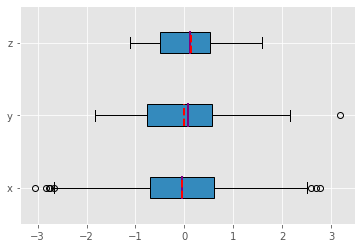

In [173]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, 
           showmeans=True, meanline=True,          
           labels=('x', 'y', 'z'), 
           patch_artist=True, 
           medianprops={'linewidth': 2, 'color': 'purple'},           
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

## Histogram

In [175]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [176]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

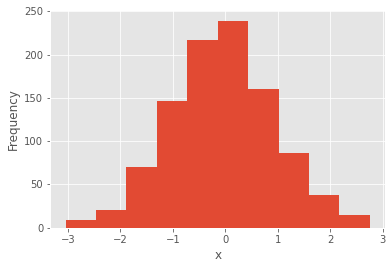

In [177]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

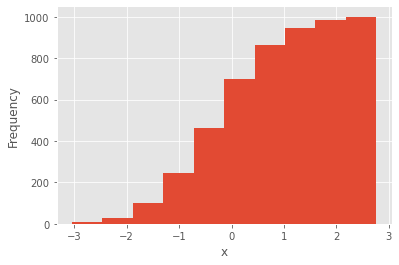

In [178]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

## Pie Charts

In [179]:
x, y, z = 128, 256, 1024

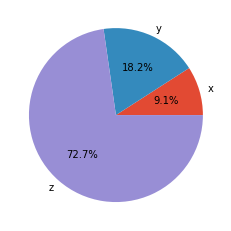

In [180]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

## Bar Charts

In [181]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

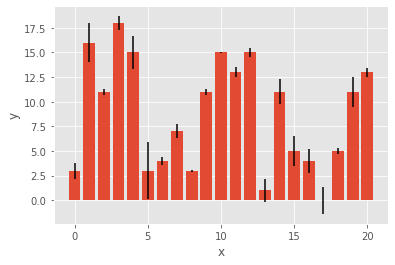

In [183]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## X-Y Plots

In [184]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

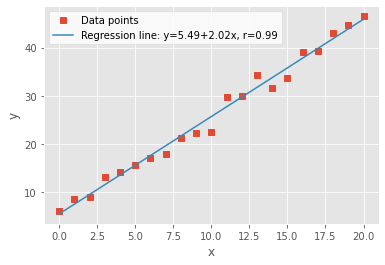

In [185]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmaps

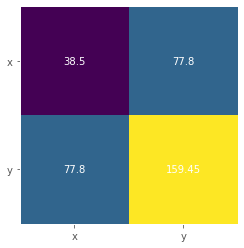

In [187]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
    for j in range(2):        
        ax.text(j, i, matrix[i, j], 
        ha='center', va='center', color='w')
plt.show()

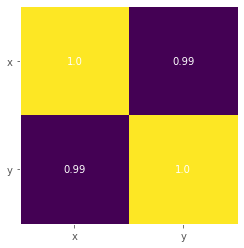

In [188]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
    for j in range(2):       
        ax.text(j, i, matrix[i, j], 
        ha='center', va='center', color='w')
plt.show()